In [1]:
%load_ext autoreload
%autoreload 2
from optical_traps import *
from optical_traps.consts import c, k_B, h_bar, u, g
from scipy.signal import find_peaks
import os
from  lightshifts import lightshift_solver
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://git.io/JeBAy')
%config InlineBackend.figure_format = 'retina'

In [2]:
ls_1S0 = lightshift_solver(os.path.join('..','resources','atom_yb173.json'), 
                           os.path.join('..','resources', 'transitions_1S0.json'))
yb_gs_pol = lambda wavelength: float(ls_1S0.scalar_polarizability(wavelength))

In [3]:
M = 171*u
ωx, ωy, ωz = 2*np.pi*np.array([218, 21.4, 32.6])
potential_init = lambda x, y, z: 1/2 * M * (ωx**2 * x**2 + ωy**2 * y**2 + ωz**2 * z**2)
fermi_gas = NonIntFermiGas(trap_freqs=(ωx, ωy, ωz), N_atoms=7656.15, T_atoms=23*1e-9, regime='3D', verbose=True)

ODT Trap Frequencies:
	 ωx   = 2π * 218.00 Hz
	 ωy   = 2π * 21.40 Hz
	 ωz   = 2π * 32.60 Hz
	 ωbar = 2π * 53.38 Hz
Selected regime: 3D
Atom number: N = 7656
Temperature: T = 23.00 nK
Fermi energy: E_F = h * 1.91 kHz
Fermi temperature: T_F = 91.75 nK
Reduced temperature: T/T_F = 0.25
Harmonic oscillator length: a_HO = 1046.21 nm
Fermi radius: R_F = 8.85 um
Fugacity: z = 23.85540300
Chemical potential: μ = 0.80 E_F
Energy per particle: E_tot/N = 1.95 kHz
Entropy per particle S_tot/N = k_B * 2.25


In [4]:
a_lat = 759.3e-9/2
site_centers = np.arange(-10*a_lat, 11*a_lat, a_lat)
ωx_2d, ωy_2d, ωz_2d = 2*np.pi*np.array([26e3, 35.0, 28.7])
model = LatticeLoadingModel(fermi_gas, potential_init, yb_gs_pol, regime='2D')

lattice_envelope_freq = 2*np.pi*0
N, S, Tr, mu0, T = model.load_lattice(site_centers, np.sqrt(ωy_2d*ωz_2d), lattice_envelope_freq)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


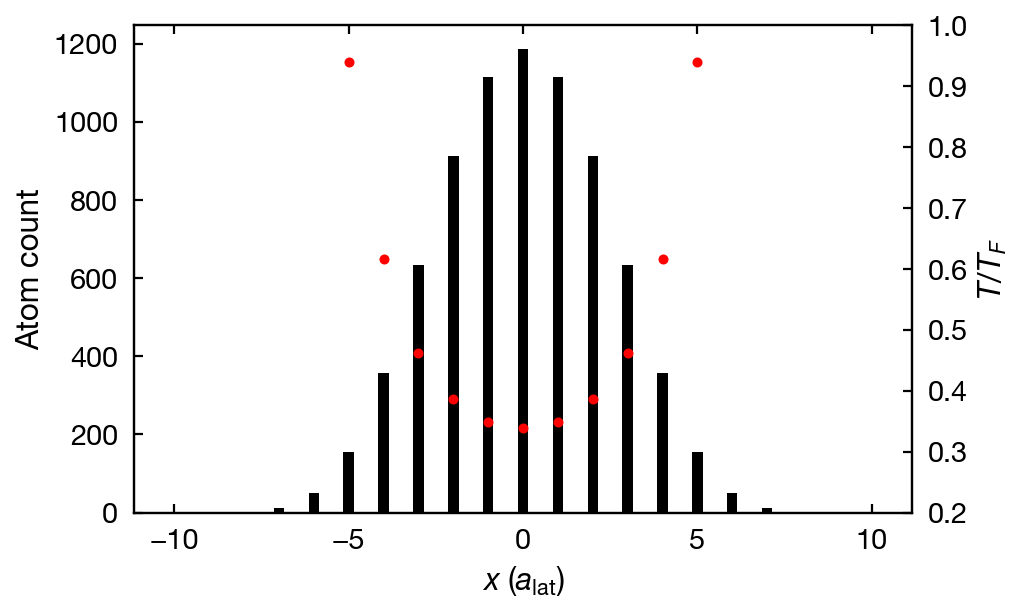

In [5]:
fig, ax = plt.subplots()
ii = np.arange(-int(len(site_centers)/2), int(len(site_centers)/2)+1)

plt.bar(ii, N, width=0.3, fc='black')
plt.ylabel('Atom count')
plt.xlabel(r'$x$ ($a_\mathrm{lat}$)')

plt.minorticks_off()
plt.tight_layout()

ax = plt.gca().twinx()
plt.sca(ax)
plt.plot(ii, Tr, 'r.')
plt.ylim(0.2, 1)
plt.ylabel('$T/T_F$')


plt.minorticks_off()

In [6]:
central_ind = int(len(site_centers)/2)
N_central = N[central_ind]
Tr_central = Tr[central_ind]

central_2d_gas = NonIntFermiGas((ωx_2d, ωy_2d, ωz_2d), N_central, T_red = Tr_central, regime='2D', verbose=True)

ODT Trap Frequencies:
	 ωx   = 2π * 26000.00 Hz
	 ωy   = 2π * 35.00 Hz
	 ωz   = 2π * 28.70 Hz
	 ωbar = 2π * 31.69 Hz
Selected regime: 2D
Atom number: N = 1188
Temperature: T = 25.06 nK
Fermi energy: E_F = h * 1.54 kHz
Fermi temperature: T_F = 74.13 nK
Reduced temperature: T/T_F = 0.34
Harmonic oscillator length: a_HO = 1357.73 nm
Fermi radius: R_F = 8.42 um
Fugacity: z = 10.75623477
Chemical potential: μ = 0.80 E_F
Energy per particle: E_tot/N = 1.49 kHz
Entropy per particle S_tot/N = k_B * 1.90


In [7]:
potential_i_2d = lambda x, y, z: 1/2 * M * (ωx_2d**2 * x**2 + ωy_2d**2 * y**2 + ωz_2d**2 * z**2)
model_1d = LatticeLoadingModel(central_2d_gas, potential_i_2d, yb_gs_pol, regime='1D')

ωx_1d, ωy_1d, ωz_1d = 2*np.pi*np.array([26e3, 26e3, 28.7])
final_lattice_envelope_freq = 2*np.pi*0

a_lat = 759.3e-9/2
site_centers = np.arange(-50*a_lat, 50.1*a_lat, a_lat)

N_1d, S_1d, Tr_1d, mu0_1d, T_1d = model_1d.load_lattice(site_centers, ωz_1d, lattice_envelope_freq)

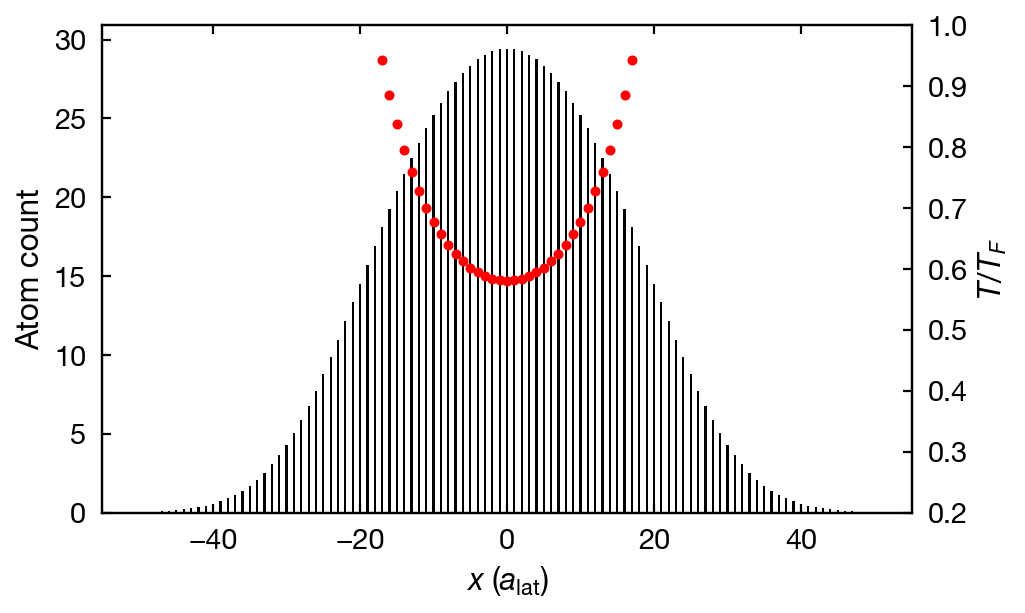

In [8]:
fig, ax = plt.subplots()
ii = np.arange(-int(len(site_centers)/2), int(len(site_centers)/2)+1)

plt.bar(ii, N_1d, width=0.3, fc='black')
plt.ylabel('Atom count')
plt.xlabel(r'$x$ ($a_\mathrm{lat}$)')

plt.minorticks_off()
plt.tight_layout()

ax = plt.gca().twinx()
plt.sca(ax)
plt.plot(ii, Tr_1d, 'r.')
plt.ylim(0.2, 1)
plt.ylabel('$T/T_F$')


plt.minorticks_off()

In [9]:
central_ind = int(len(site_centers)/2)
N_1d_central = N_1d[central_ind]
Tr_1d_central = Tr_1d[central_ind]

central_1d_gas = NonIntFermiGas((ωx_1d, ωy_1d, ωz_1d), N_1d_central, T_red = Tr_1d_central, regime='1D', verbose=True)

ODT Trap Frequencies:
	 ωx   = 2π * 26000.00 Hz
	 ωy   = 2π * 26000.00 Hz
	 ωz   = 2π * 28.70 Hz
	 ωbar = 2π * 28.70 Hz
Selected regime: 1D
Atom number: N = 29
Temperature: T = 23.53 nK
Fermi energy: E_F = h * 0.84 kHz
Fermi temperature: T_F = 40.54 nK
Reduced temperature: T/T_F = 0.58
Harmonic oscillator length: a_HO = 1426.79 nm
Fermi radius: R_F = 4.78 um
Fugacity: z = 4.60254099
Chemical potential: μ = 0.89 E_F
Energy per particle: E_tot/N = 0.74 kHz
Entropy per particle S_tot/N = k_B * 1.50
